## SIMULATION_OLP Création d'un second ordre

In [197]:
import pandas as pd
import numpy as np
import math
import package_DBR

import matplotlib.pyplot as plt
from package_DBR import myRound, SelectPath_RT, Delay_RT, FO_RT, FOPDT, SOPDT, FOPDT_cost, SOPDT_cost, Process, Bode

### Load Data

In [198]:
nameFile = 'Cleaned_data_Open_loop_experiment_on_MV_2024-03-18-09h26.txt'

titleName = nameFile.split('.')[0]    
data = pd.read_csv('Data/' + nameFile)

if 'MV' in nameFile:
    ExpVariable = 'MV'
    tm = data['tm'].values
    MVm = data['MVm'].values
    PVm = data['PVm'].values    
else:    
    ExpVariable = 'DV'
    tm = data['tm'].values
    DVm = data['DVm'].values 
    PVm = data['PVm'].values
     
print(ExpVariable)

MV


### Model Approximations

In [199]:
a = 0.15   # [°C/%]
t1 = 60    # 28% of PV_inf [sec]
t2 = 80   # 40% of PV_inf [sec]
T_u = 60   # Approximated Delay [sec]
T_g = 120  # 
Kp = 0.47  # % of PV value [°C/%]

false_theta = 30

PV_28 = 0.28*Kp # % of PV value [°C/%]
PV_40 = 0.4*Kp # % of PV value [°C/%]

print(PV_28)
print(PV_40)

t = []
MV = []

TSim = 720 # Simulation Time [s]

MVPath = {0:0, 1:1, TSim:1}
Ts = 1     # Sampling Period [s]

N = int(TSim/Ts) + 1

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)


0.1316
0.188


### Response for FOPDT (obtained with Broida Model 1)

In [200]:
T_B1 = T_g
theta_B1 = T_u

### Response for FOPDT (obtained with Broida Model 2)

In [201]:
T_B2 = 5.5*(t2 - t1) 
theta_B2 = (2.8*t1) - (1.8*t2)

print(T_B2, theta_B2)

110.0 24.0


### Response for SOPDT (obtained with van der Grinten)

In [202]:
#cstes for VDG model
e = math.e
T1VDG = T_g * ((3 * a * e - 1)/(1 + a * e))
T2VDG = T_g * (1 - a * e)/(1 + a * e)
thetaVDG = T_u - (T1VDG * T2VDG)/(T1VDG + 3 * T2VDG)

print(T1VDG, T2VDG, thetaVDG)


19.02849635648043 50.48575182175978 54.36511301191378


### Response for n-th Order model with Identical Poles (obtained with Strejc)

In [203]:
a_n_test = T_u / T_g # = 0.0655 => a_n = 0 =< 0.0655 < a_n+1 = 1  => n = 1
print(a_n_test)

n = 2
a_n = 0.10
b_n = 2.72

T_S = T_g / b_n
T_u_th_S = a_n * T_g
theta_S = T_u - T_u_th_S

print(T_S, T_u_th_S, theta_S)

0.5
44.11764705882353 12.0 48.0


### Step Responses

(0.0, 720.0)

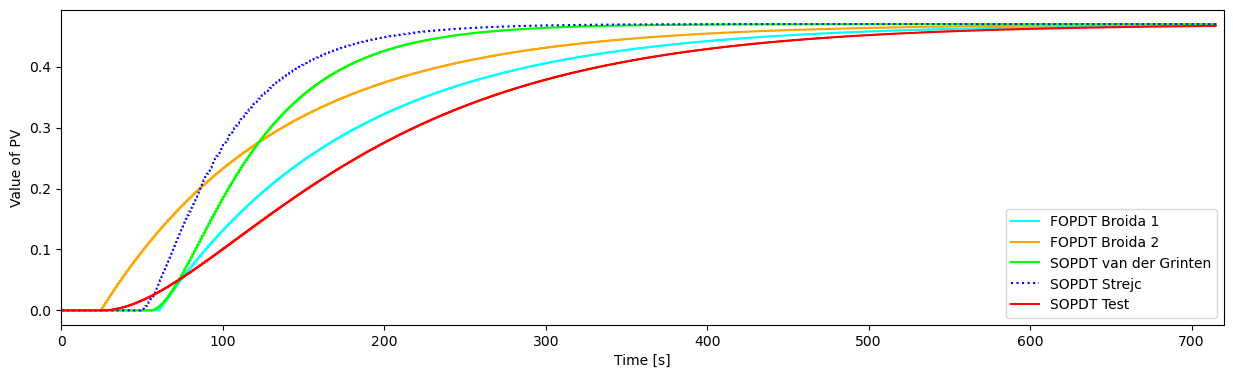

In [204]:
FOPDT_P_B1 = FOPDT(MVm, Kp, T_B1, theta_B1, Ts)
FOPDT_P_B2 = FOPDT(MVm, Kp, T_B2, theta_B2, Ts)
PVSOPDT_VDG = SOPDT(MVm,Kp,T1VDG,T2VDG,thetaVDG,Ts)
PVSOPDT_S = SOPDT(MVm, Kp, T_S, T_u_th_S, theta_S, Ts)

False_SOPDT = SOPDT(MVm, Kp, T_u, T_g, 25, Ts)


plt.figure(figsize = (15,9))

plt.subplot(2,1,2)
plt.step(tm,FOPDT_P_B1,'cyan',label='FOPDT Broida 1',where='post')
plt.step(tm,FOPDT_P_B2,'orange',label='FOPDT Broida 2',where='post')
plt.step(tm,PVSOPDT_VDG,'lime',label='SOPDT van der Grinten', where='post')
plt.step(tm,PVSOPDT_S,'blue',label='SOPDT Strejc', ls = ':',where='post')
plt.step(tm,False_SOPDT,'red',label='SOPDT Test',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])    